#Mounting Google Drive

In [0]:

from google.colab import drive
drive.mount('../content/drive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at ../content/drive/


#Loading the modules

In [0]:
import sys
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

Using TensorFlow backend.


#Loading and processing  the training data

In [0]:

# load ascii text and covert to lowercase
filename = "lstm.txt"
raw_text = open(filename).read()
print(raw_text)

﻿Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
[Last updated: December 20, 2011]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***










ALICE'S ADVENTURES IN WONDERLAND

Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0




CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictur

In [0]:
raw_text = raw_text.lower()
print(raw_text)

﻿project gutenberg's alice's adventures in wonderland, by lewis carroll

this ebook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  you may copy it, give it away or
re-use it under the terms of the project gutenberg license included
with this ebook or online at www.gutenberg.org


title: alice's adventures in wonderland

author: lewis carroll

posting date: june 25, 2008 [ebook #11]
release date: march, 1994
[last updated: december 20, 2011]

language: english


*** start of this project gutenberg ebook alice's adventures in wonderland ***










alice's adventures in wonderland

lewis carroll

the millennium fulcrum edition 3.0




chapter i. down the rabbit-hole

alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought alice 'without pictur

In [0]:
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
print(chars)

['\n', ' ', '!', '"', '#', '$', '%', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', '@', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\ufeff']


In [0]:
char_to_int = dict((c, i) for i, c in enumerate(chars))
print(char_to_int)

{'\n': 0, ' ': 1, '!': 2, '"': 3, '#': 4, '$': 5, '%': 6, "'": 7, '(': 8, ')': 9, '*': 10, ',': 11, '-': 12, '.': 13, '/': 14, '0': 15, '1': 16, '2': 17, '3': 18, '4': 19, '5': 20, '6': 21, '7': 22, '8': 23, '9': 24, ':': 25, ';': 26, '?': 27, '@': 28, '[': 29, ']': 30, '_': 31, 'a': 32, 'b': 33, 'c': 34, 'd': 35, 'e': 36, 'f': 37, 'g': 38, 'h': 39, 'i': 40, 'j': 41, 'k': 42, 'l': 43, 'm': 44, 'n': 45, 'o': 46, 'p': 47, 'q': 48, 'r': 49, 's': 50, 't': 51, 'u': 52, 'v': 53, 'w': 54, 'x': 55, 'y': 56, 'z': 57, '\ufeff': 58}


In [0]:
n_chars = len(raw_text)
n_vocab = len(chars)
print ("Total Characters: ", n_chars)
print ("Total Vocab: ", n_vocab)

Total Characters:  163781
Total Vocab:  59


In [0]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print ("Total Patterns: ", n_patterns)

Total Patterns:  163681


##Removing the puntuations

In [0]:
# define punctuation
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

my_str = raw_text

# To take input from the user
# my_str = input("Enter a string: ")

# remove punctuation from the string
no_punct = ""
for char in my_str:
   if char not in punctuations:
       no_punct = no_punct + char

In [0]:
print(no_punct)

﻿project gutenbergs alices adventures in wonderland by lewis carroll

this ebook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever  you may copy it give it away or
reuse it under the terms of the project gutenberg license included
with this ebook or online at wwwgutenbergorg


title alices adventures in wonderland

author lewis carroll

posting date june 25 2008 ebook 11
release date march 1994
last updated december 20 2011

language english


 start of this project gutenberg ebook alices adventures in wonderland 










alices adventures in wonderland

lewis carroll

the millennium fulcrum edition 30




chapter i down the rabbithole

alice was beginning to get very tired of sitting by her sister on the
bank and of having nothing to do once or twice she had peeped into the
book her sister was reading but it had no pictures or conversations in
it and what is the use of a book thought alice without pictures or
conversations

so she was considerin

In [0]:
text = no_punct

In [0]:
# create mapping of unique chars to integers
chars = sorted(list(set(text)))
print(chars)

['\n', ' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\ufeff']


In [0]:
char_to_int = dict((c, i) for i, c in enumerate(chars))
print(char_to_int)

{'\n': 0, ' ': 1, '0': 2, '1': 3, '2': 4, '3': 5, '4': 6, '5': 7, '6': 8, '7': 9, '8': 10, '9': 11, 'a': 12, 'b': 13, 'c': 14, 'd': 15, 'e': 16, 'f': 17, 'g': 18, 'h': 19, 'i': 20, 'j': 21, 'k': 22, 'l': 23, 'm': 24, 'n': 25, 'o': 26, 'p': 27, 'q': 28, 'r': 29, 's': 30, 't': 31, 'u': 32, 'v': 33, 'w': 34, 'x': 35, 'y': 36, 'z': 37, '\ufeff': 38}


In [0]:
n_chars = len(text)
n_vocab = len(chars)
print ("Total Characters: ", n_chars)
print ("Total Vocab: ", n_vocab)

Total Characters:  154861
Total Vocab:  39


In [0]:

# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = text[i:i + seq_length]
	seq_out = text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print ("Total Patterns: ", n_patterns)

Total Patterns:  154761


In [0]:
# print(raw_text)

In [0]:
print(dataX[1:2])

[[27, 29, 26, 21, 16, 14, 31, 1, 18, 32, 31, 16, 25, 13, 16, 29, 18, 30, 1, 12, 23, 20, 14, 16, 30, 1, 12, 15, 33, 16, 25, 31, 32, 29, 16, 30, 1, 20, 25, 1, 34, 26, 25, 15, 16, 29, 23, 12, 25, 15, 1, 13, 36, 1, 23, 16, 34, 20, 30, 1, 14, 12, 29, 29, 26, 23, 23, 0, 0, 31, 19, 20, 30, 1, 16, 13, 26, 26, 22, 1, 20, 30, 1, 17, 26, 29, 1, 31, 19, 16, 1, 32, 30, 16, 1, 26, 17, 1, 12, 25]]


In [0]:
# print(dataX)
print(dataY)

[25, 36, 26, 25, 16, 1, 12, 25, 36, 34, 19, 16, 29, 16, 1, 12, 31, 1, 25, 26, 1, 14, 26, 30, 31, 1, 12, 25, 15, 1, 34, 20, 31, 19, 0, 12, 23, 24, 26, 30, 31, 1, 25, 26, 1, 29, 16, 30, 31, 29, 20, 14, 31, 20, 26, 25, 30, 1, 34, 19, 12, 31, 30, 26, 16, 33, 16, 29, 1, 1, 36, 26, 32, 1, 24, 12, 36, 1, 14, 26, 27, 36, 1, 20, 31, 1, 18, 20, 33, 16, 1, 20, 31, 1, 12, 34, 12, 36, 1, 26, 29, 0, 29, 16, 32, 30, 16, 1, 20, 31, 1, 32, 25, 15, 16, 29, 1, 31, 19, 16, 1, 31, 16, 29, 24, 30, 1, 26, 17, 1, 31, 19, 16, 1, 27, 29, 26, 21, 16, 14, 31, 1, 18, 32, 31, 16, 25, 13, 16, 29, 18, 1, 23, 20, 14, 16, 25, 30, 16, 1, 20, 25, 14, 23, 32, 15, 16, 15, 0, 34, 20, 31, 19, 1, 31, 19, 20, 30, 1, 16, 13, 26, 26, 22, 1, 26, 29, 1, 26, 25, 23, 20, 25, 16, 1, 12, 31, 1, 34, 34, 34, 18, 32, 31, 16, 25, 13, 16, 29, 18, 26, 29, 18, 0, 0, 0, 31, 20, 31, 23, 16, 1, 12, 23, 20, 14, 16, 30, 1, 12, 15, 33, 16, 25, 31, 32, 29, 16, 30, 1, 20, 25, 1, 34, 26, 25, 15, 16, 29, 23, 12, 25, 15, 0, 0, 12, 32, 31, 19, 26, 29, 1

##Padding the sequence

In [0]:

from keras.preprocessing.sequence import pad_sequences
# define sequences
sequences = [dataX
	]
# pad sequence
paddeddataX = pad_sequences(sequences,padding  ='post')
print(paddeddataX)

# from keras.preprocessing.sequence import pad_sequences
# # define sequences
# sequences = [dataY
# 	]
# # pad sequence
# paddeddataY = pad_sequences(sequences,padding  ='post')
# print(paddeddataY)


# # reshape X to be [samples, time steps, features]
X = numpy.reshape(paddeddataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# # # one hot encode the output variable
# y = np_utils.to_categorical(paddeddataY)

[[[38 27 29 ... 17  1 12]
  [27 29 26 ...  1 12 25]
  [29 26 21 ... 12 25 36]
  ...
  [34  1 31 ... 13 26 26]
  [ 1 31 26 ... 26 26 22]
  [31 26  1 ... 26 22 30]]]


In [0]:

# # reshape X to be [samples, time steps, features]
# X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# # normalize
# X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)
print(X.shape)
print(y.shape)

(154761, 100, 1)
(154761, 38)


In [0]:
# print(X)

#Model

In [0]:

# define the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X.shape[1],X.shape[2]),return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(256))
# model.add(Dropout(0.1))
# model.add(LSTM(512))
# model.add(Dropout(0.1))
# model.add(LSTM(X.shape[1],return_sequences=True,activation='tanh'))
# model.add(Dropout(0.1))
# model.add(LSTM(y.shape[1],return_sequences=True, activation='tanh'))
# model.add(Dropout(0.1))
# model.add(LSTM(y.shape[1],return_sequences=True, activation='tanh'))

model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

W0811 00:15:34.458647 140268970116992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 00:15:34.500269 140268970116992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 00:15:34.508647 140268970116992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0811 00:15:34.765501 140268970116992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0811 00:15:34.774727 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 128)          66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dense_1 (Dense)              (None, 38)                9766      
Total params: 470,566
Trainable params: 470,566
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='/content/drive/My Drive/Colab Notebooks/EIP-Phase 2/2/LSTM_plot.png', show_shapes=True, show_layer_names=True)


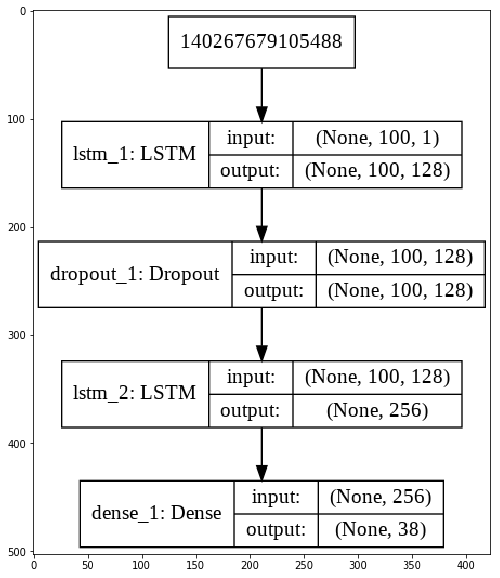

In [0]:
import matplotlib.pyplot as plt 
import cv2 
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/EIP-Phase 2/2/LSTM_plot.png')
plt.figure(figsize=(20,10))
plt.imshow(img)


##Call back: check points for storing the weights

In [0]:

# define the checkpoint
filepath="/content/drive/My Drive/Colab Notebooks/EIP-Phase 2/2/A2-weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

##Training the  Model

In [0]:
model.fit(X, y, epochs=100, batch_size=512, callbacks=callbacks_list)

Epoch 1/100
154761/154761 [==============================] - 79s 512us/step - loss: 2.0817

Epoch 00001: loss improved from 2.41282 to 2.08171, saving model to /content/drive/My Drive/Colab Notebooks/EIP-Phase 2/2/A2-weights-improvement-01-2.0817.hdf5
Epoch 2/100
154761/154761 [==============================] - 79s 509us/step - loss: 2.0235

Epoch 00002: loss improved from 2.08171 to 2.02350, saving model to /content/drive/My Drive/Colab Notebooks/EIP-Phase 2/2/A2-weights-improvement-02-2.0235.hdf5
Epoch 3/100
154761/154761 [==============================] - 79s 513us/step - loss: 1.9692

Epoch 00003: loss improved from 2.02350 to 1.96917, saving model to /content/drive/My Drive/Colab Notebooks/EIP-Phase 2/2/A2-weights-improvement-03-1.9692.hdf5
Epoch 4/100
154761/154761 [==============================] - 79s 511us/step - loss: 1.9178

Epoch 00004: loss improved from 1.96917 to 1.91776, saving model to /content/drive/My Drive/Colab Notebooks/EIP-Phase 2/2/A2-weights-improvement-04-1.91

In [0]:

# load the network weights
filename = "/content/drive/My Drive/Colab Notebooks/EIP-Phase 2/2/A2-weights-improvement-100-0.7085.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [0]:
int_to_char = dict((i, c) for i, c in enumerate(chars))

#Prediction

In [0]:

# pick a random seed
start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print ("Seed:")
print( "\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generate characters
for i in range(500):
	x = numpy.reshape(pattern, (1, len(pattern), 1))
	x = x / float(n_vocab)
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	sys.stdout.write(result)
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print( "\nDone.")

Seed:
" even finish if he doesnt begin but
she waited patiently

once said the mock turtle at last with a de "
al forgdtdd she white rabbit bhear heart there was a good deal the sime he had been anything the thought alice had not have iu said the king 
the queen three wery darned or alice wentured to be aflon on one there are to be thingsed the dormouse and said to the dxecutioner wio were alice had no eoun on their slates when the mouse was speaking to ae allost with a ttume and she pabbit seaming me very like a stoe in ansos and it said nothing

whos should like to be sure she had for to the door and t
Done.
